# View analytic atmosphere

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date August 14th 2020
- last update : October 21th 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [2]:
import sys
sys.path

['/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/libradtranpy/docs/notebooks/analyticalmodels',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python310.zip',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/lib-dynload',
 '',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/site-packages',
 '/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/AtmEmulator/src',
 '/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/FitDiffAtmo/src',
 '/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/libradtranpy/src',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/site-packages/getObsAtmo-0.1.0-py3.10.egg']

In [3]:
# preselected sites 
Dict_Of_sitesAltitudes = {'LSST':2.663,
                          'CTIO':2.207,
                          'OHP':0.65,
                          'PDM':2.8905,
                          'OMK':4.205,
                          'OSL':0.000,
                           }
# pressure calculated by libradtran
Dict_Of_sitesPressures = {'LSST':731.50433,
                          'CTIO':774.6052,
                          'OHP':937.22595,
                          'PDM':710.90637,
                          'OMK':600.17224,
                          'OSL':1013.000,
                        }

In [4]:
from analyticalmodels import libatmscattering as atm

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
NWL=100

In [7]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NWL)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NWL), alpha=1)

In [8]:
lsst_altitude = 2.663 #km
lsst_pressure = 743.0 # hPa

# Pressure

In [9]:
h=np.linspace(0,10000.,100)
P=atm.Pressure_adiabatic(h)/atm.P0

Text(0, 0.5, 'Altitude (m)')

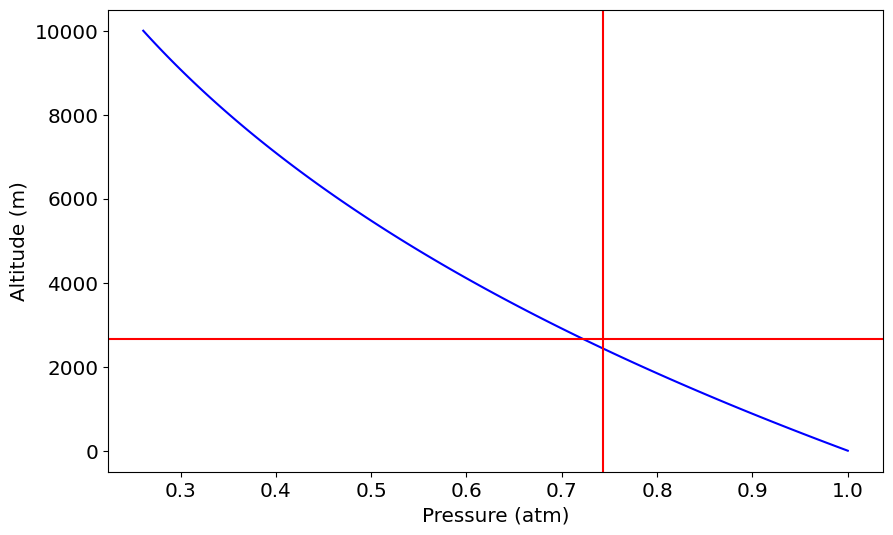

In [10]:
ax = plt.subplot(111)
ax.plot(P,h,'b-')
ax.axhline(lsst_altitude*1000,color="r")
ax.axvline(lsst_pressure/1000,color="r")
ax.set_xlabel("Pressure (atm)")
ax.set_ylabel("Altitude (m)")

In [11]:
wavelength=np.arange(350,1100)
OD=atm.RayOptDepth_adiabatic(wavelength, altitude=atm.altitude0, costh=1)

Text(0, 0.5, 'Optical Depth')

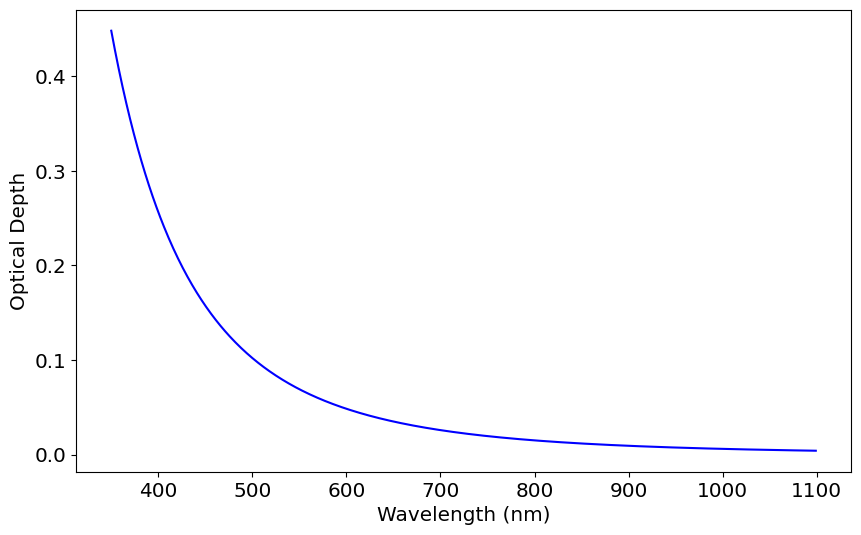

In [12]:
ax = plt.subplot(111)
ax.plot(wavelength,OD,'b-')
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Optical Depth")